In [6]:
# Dez 23 kernel
ros1 = open('/Users/creator/Documents/Research/Bioinformatics/Idea/ROS1.fasta', 'r').read().splitlines()[1:]
ros1 = "".join(ros1)

MKNIYCLIPKLVNFATLGCLWISVVQCTVLNSCLKSCVTNLGQQLDLGTPHNLSEPCIQGCHFWNSVDQKNCALKCRESCEVGCSSAEGAYEEEVLENADLPTAPFASSIGSHNMTLRWKSANFSGVKYIIQWKYAQLLGSWTYTKTVSRPSYVVKPLHPFTEYIFRVVWIFTAQLQLYSPPSPSYRTHPHGVPETAPLIRNIESSSPDTVEVSWDPPQFPGGPILGYNLRLISKNQKLDAGTQRTSFQFYSTLPNTIYRFSIAAVNEVGEGPEAESSITTSSSAVQQEEQWLFLSRKTSLRKRSLKHLVDEAHCLRLDAIYHNITGISVDVHQQIVYFSEGTLIWAKKAANMSDVSDLRIFYRGSGLISSISIDWLYQRMYFIMDELVCVCDLENCSNIEEITPPSISAPQKIVADSYNGYVFYLLRDGIYRADLPVPSGRCAEAVRIVESCTLKDFAIKPQAKRIIYFNDTAQVFMSTFLDGSASHLILPRIPFADVKSFACENNDFLVTDGKVIFQQDALSFNEFIVGCDLSHIEEFGFGNLVIFGSSSQLHPLPGRPQELSVLFGSHQALVQWKPPALAIGANVILISDIIELFELGPSAWQNWTYEVKVSTQDPPEVTHIFLNISGTMLNVPELQSAMKYKVSVRASSPKRPGPWSEPSVGTTLVPASEPPFIMAVKEDGLWSKPLNSFGPGEFLSSDIGNVSDMDWYNNSLYYSDTKGDVFVWLLNGTDISENYHLPSIAGAGALAFEWLGHFLYWAGKTYVIQRQSVLTGHTDIVTHVKLLVNDMVVDSVGGYLYWTTLYSVESTRLNGESSLVLQTQPWFSGKKVIALTLDLSDGLLYWLVQDSQCIHLYTAVLRGQSTGDTTITEFAAWSTSEISQNALMYYSGRLFWINGFRIITTQEIGQKTSVSVLEPARFNQFTIIQTSLKPLPGNFSFTPKVIPDSVQESSFRIEGNASSFQILWNGPPAVDWGVVFYSVEFSAHSKFLASEQHSL

In [23]:
# CHARACTER ENCODING
amino_acids = sorted(list(set(ros1)))     # set() creates unordered collection of unique elements by removing duplicate elements from an iterable, such as a list or tuple, and returns a new set object
                                              # code re-makes one giant string with all names, gets unique characters, puts them in a list and sorts them alphabetically
print(len(amino_acids))
stoi = {s:i for i, s in enumerate(amino_acids)}    # enumerate() iterates with index over unique character list, create dictionary with each character (s) and the index from the iterator (start at 0) + 1
itos = {i:s for s,i in stoi.items()}           # invert the string_to_integer dictionary


# BIGRAM WITH TORCH.TENSOR AND CHARACTER ENCODING
import torch
N = torch.zeros((20, 20), dtype=torch.int32)        # (m, n) m-rows, n-columns              .int32 <- 32 bit (1 bit = 0 or 1) before the point/comma using Binärsystem (1 von bit 5 -> 16 <- Handzählen Mink)

# for kinase:
ros1 = ros1[1945:2222]

for ch1, ch2 in zip(ros1, ros1[1:]):
    ix1 = stoi[ch1]                           # get integer encoding the first character
    ix2 = stoi[ch2]                           # get integer encoding the 2. character coming after the 1. character
    N[ix1, ix2] += 1                          # add 1 occurence in the row of the 1. character and the column of the 2. character

20


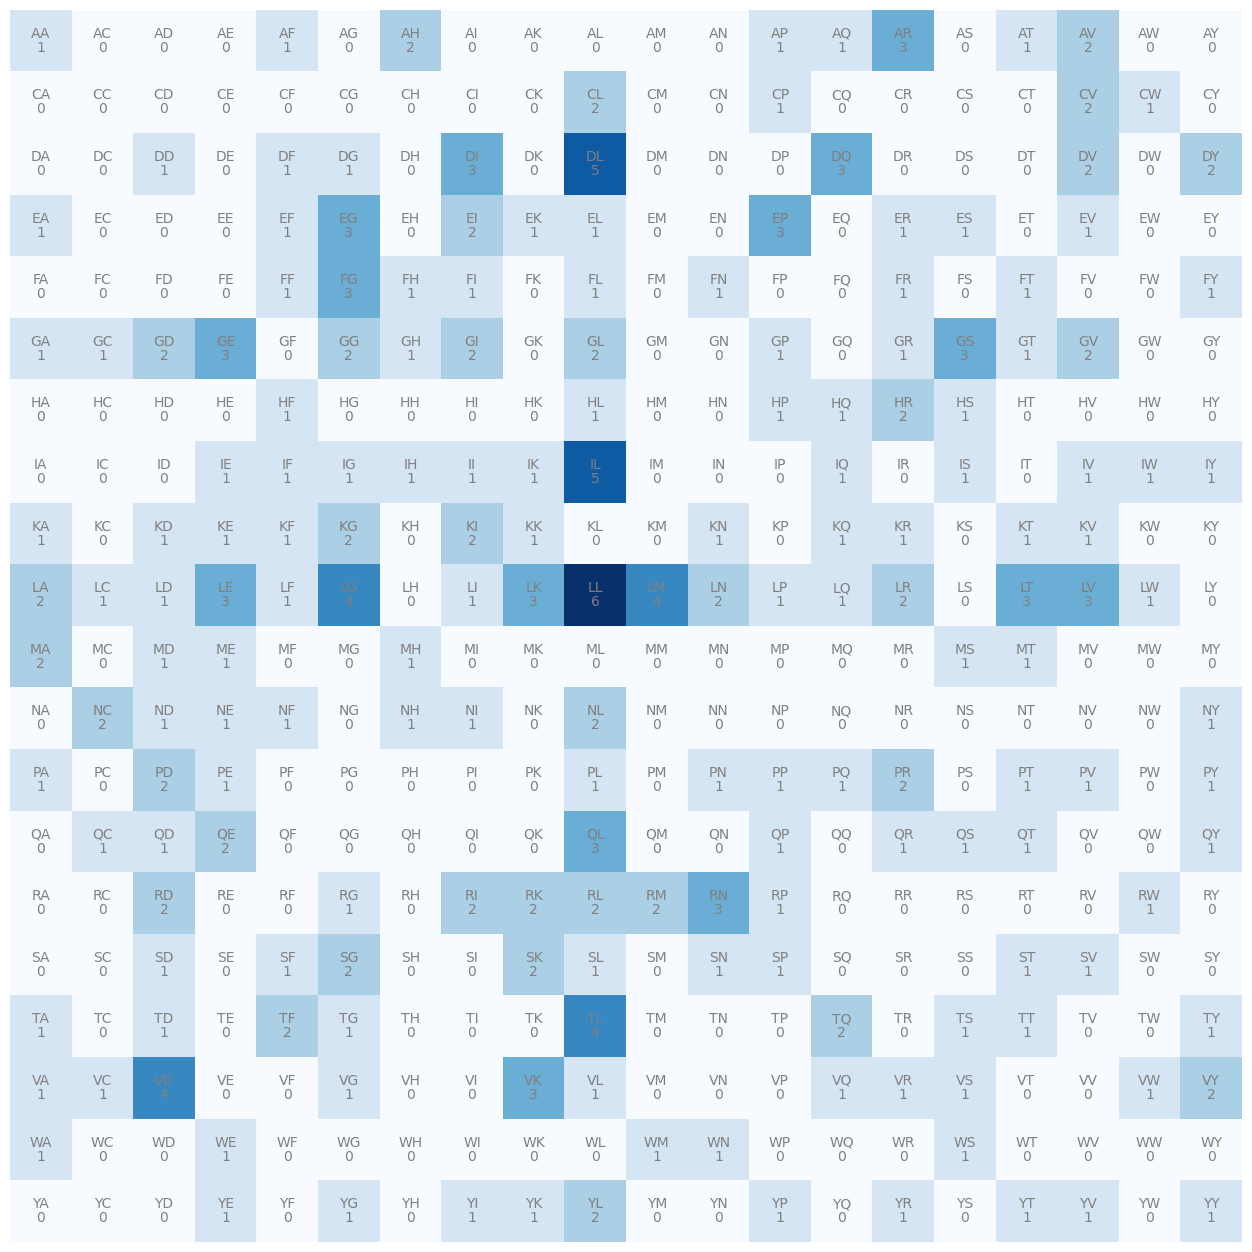

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(20):
    for j in range(20):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [21]:
max_value = torch.max(N)
print(max_value.item())

20


'EPDQRPTFHRIQDQLQLFRNFFLNSIYKSRDEANNSGVINESFEGEDGDVICLNSDDIMPVALMETKNREGLNYMVLATECGQGEEKSEGPLGSQESESCGLRKEEKEPHADKDFCQEKQVAYCPSGKPEGLNYACLTHSGYGDGSD'